In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv(r"C:\Users\Sangeeta\Desktop\housing_price_dataset.csv")

In [23]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [24]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

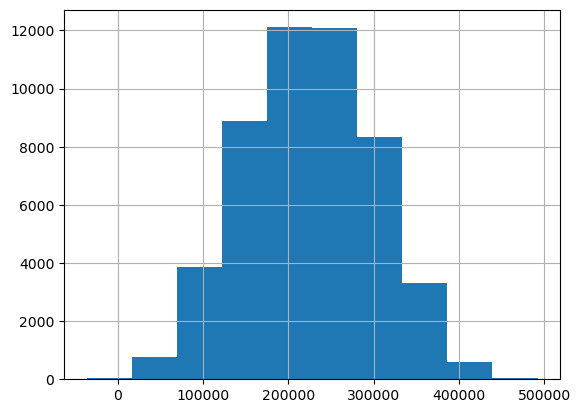

In [25]:
import matplotlib.pyplot as plt
df['Price'].hist()
plt.show()


In [26]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

<Axes: xlabel='Bedrooms'>

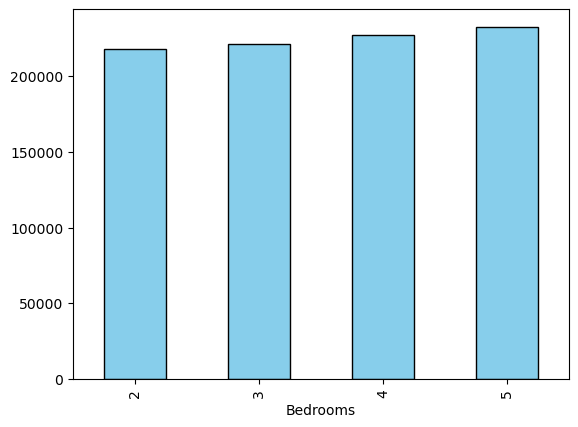

In [36]:
bedroom_price_mean=df.groupby('Bedrooms')['Price'].mean()
bedroom_price_mean.plot(kind='bar', color='skyblue', edgecolor='black')#The number of bedrooms in a house doesnt have any significant effect on the price of the house

<Axes: xlabel='Bathrooms'>

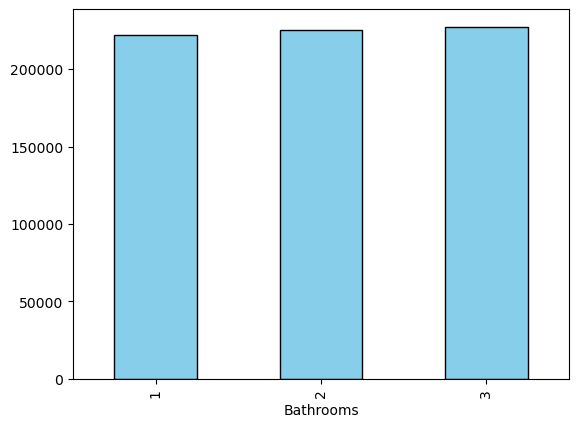

In [37]:
bathroom_price_mean=df.groupby('Bathrooms')['Price'].mean() 
bathroom_price_mean.plot(kind='bar', color='skyblue', edgecolor='black')#The number of bathrooms in a house doesnt have any significant effect on the price of the house

<Axes: ylabel='SquareFeet'>

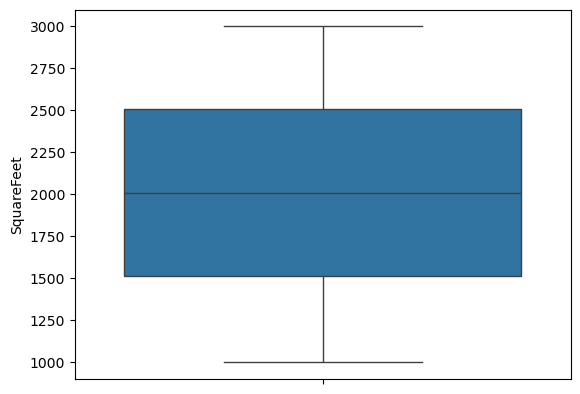

In [32]:
sns.boxplot(df['SquareFeet'])

In [41]:
neighborhood_price_mean=df.groupby('Neighborhood')['Price'].mean()

<Axes: xlabel='Neighborhood'>

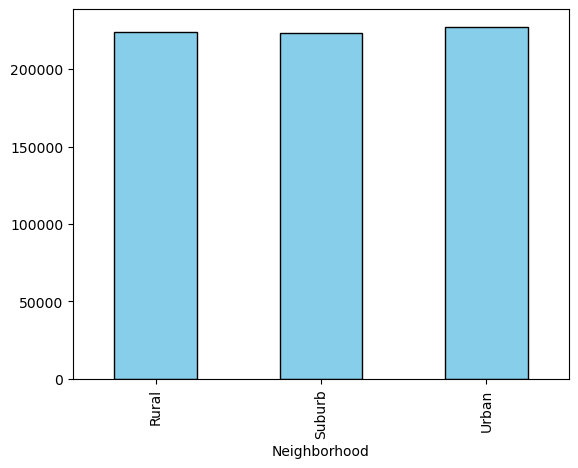

In [42]:
neighborhood_price_mean.plot(kind='bar', color='skyblue', edgecolor='black')

<Axes: >

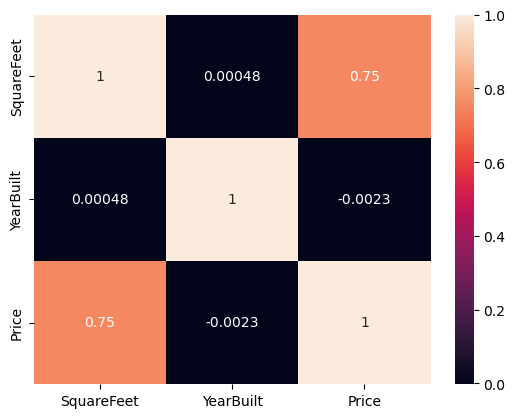

In [46]:
sns.heatmap(df[['SquareFeet', 'YearBuilt','Price']].corr(),annot=True)

In [49]:
#BUILDING THE MODEL
#Importing the stats models for further analysis-EDA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

model=smf.ols(formula="Price ~ SquareFeet+Bedrooms+Bathrooms+Neighborhood+YearBuilt",data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 1.106e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:01:47   Log-Likelihood:            -6.1185e+05
No. Observations:               50000   AIC:                         1.224e+06
Df Residuals:                   49993   BIC:                         1.224e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.34

In [51]:
model1=smf.ols(formula="Price ~ SquareFeet+Bedrooms+Bathrooms+YearBuilt",data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 1.657e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:02:50   Log-Likelihood:            -6.1186e+05
No. Observations:               50000   AIC:                         1.224e+06
Df Residuals:                   49995   BIC:                         1.224e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.394e+04   2.14e+04      1.118      0.2

In [52]:
model2=smf.ols(formula="Price ~ SquareFeet+Bedrooms+Bathrooms",data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 2.210e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:03:43   Log-Likelihood:            -6.1186e+05
No. Observations:               50000   AIC:                         1.224e+06
Df Residuals:                   49996   BIC:                         1.224e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2073.8676   1201.569      1.726      0.0

In [53]:
model3=smf.ols(formula="Price ~ SquareFeet",data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                 6.457e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:04:18   Log-Likelihood:            -6.1224e+05
No. Observations:               50000   AIC:                         1.224e+06
Df Residuals:                   49998   BIC:                         1.224e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.555e+04    815.878     31.316      0.0

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df[['SquareFeet']]
y=df['Price']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [62]:
m=LinearRegression()

In [63]:
m.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred_train=m.predict(X_train)
y_pred_test=m.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)
print(r2_train)

0.5586912014923469


In [69]:
r2_test=r2_score(y_test,y_pred_test)
print(r2_test)

0.5782140025974528


In [70]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: One-hot encoding categorical columns
df_encoded = pd.get_dummies(df, columns=['Bedrooms', 'Bathrooms', 'Neighborhood'], drop_first=True)

# Step 2: Define the features (X) and target variable (y)
X = df_encoded.drop('Price', axis=1)  # Features (excluding the target column)
y = df_encoded['Price']  # Target variable (Price)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the linear regression model
model = LinearRegression()

# Step 5: Fit the model on the training data
model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Optionally: Print model coefficients (for interpretation)
print("\nModel Coefficients:", model.coef_)


Mean Squared Error (MSE): 2435703051.6703157
R-squared (R2): 0.5756580414410524

Model Coefficients: [ 9.93434496e+01 -5.82619707e+00  4.09972150e+03  9.84181020e+03
  1.55131385e+04  3.62408408e+03  5.93626522e+03 -5.90139606e+02
  1.41860307e+03]
